In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./ml_source_files/titanic_train.csv')

In [3]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


<AxesSubplot:>

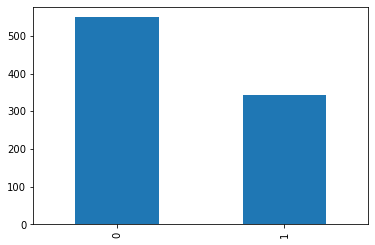

In [5]:
df.Survived.value_counts().plot(kind='bar')

In [6]:
df.drop('Cabin', axis=1, inplace=True)

In [24]:
df.Age.fillna(df.Age.mean())
df['Age'] = df['Age'].dropna(inplace=True)

In [25]:
y = df['Survived']
x = df[['PassengerId','Pclass','Age','SibSp','Parch','Embarked']]

In [26]:
x = pd.get_dummies(x)


In [27]:
x.isna().sum()

PassengerId    0
Pclass         0
SibSp          0
Parch          0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=100)

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
lr = LogisticRegression()

In [32]:
lr.fit(x_train, y_train)

LogisticRegression()

In [33]:
preds = lr.predict(x_test)

In [34]:
preds

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix

In [37]:
confusion_matrix(y_test, preds)

array([[94, 10],
       [49, 26]], dtype=int64)

In [38]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.66      0.90      0.76       104
           1       0.72      0.35      0.47        75

    accuracy                           0.67       179
   macro avg       0.69      0.63      0.61       179
weighted avg       0.68      0.67      0.64       179

